### Making Recommendations Based on Correlation

In [1]:
import numpy as np
import pandas as pd

Datasets source: https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data

Published by: Blanca Vargas-Govea, Juan Gabriel GonzÃ¡lez-Serna, Rafael Ponce-MedellÃ­n. Effects of relevant contextual features in the performance of a restaurant recommender system. In RecSysâ€™11: Workshop on Context Aware Recommender Systems (CARS-2011), Chicago, IL, USA, October 23, 2011.

In [2]:
geo_data = pd.read_csv('geoplaces2.csv',  encoding='latin-1')
cusine = pd.read_csv('chefmozcuisine.csv')
rating = pd.read_csv('rating_final.csv')

In [3]:
geo_data.head(5)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [4]:
cusine.head(5)

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [5]:
rating.head(5)


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [6]:
places = geo_data[['placeID', 'name']]
places.head(5)

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


## Grouping and Ranking Data

In [7]:
# Rating for each place
ratings = pd.DataFrame(rating.groupby('placeID')['rating'].mean())
ratings.head()

,rating
placeID,
132560,0.50
132561,0.75
132564,1.25
132572,1.00
132583,1.00


In [8]:
# Numbe of ratings given
ratings['rating_count'] = pd.DataFrame(rating.groupby('placeID')['rating'].count())
ratings.head(5)

,rating,rating_count
placeID,,
132560,0.50,4
132561,0.75,4
132564,1.25,4
132572,1.00,15
132583,1.00,4


In [9]:
ratings.describe()


,rating,rating_count
count,130.000000,130.000000
mean,1.179622,8.930769
std,0.349354,6.124279
min,0.250000,3.000000
25%,1.000000,5.000000
50%,1.181818,7.000000
75%,1.400000,11.000000
max,2.000000,36.000000


###### Most popolar place has 36 rating
###### 130 unique places

In [10]:
ratings.sort_values('rating_count', ascending=False).head(5)

,rating,rating_count
placeID,,
135085,1.333333,36
132825,1.281250,32
135032,1.178571,28
135052,1.280000,25
132834,1.000000,25


In [11]:
places[places.placeID == 135085]

,placeID,name
121,135085,Tortas Locas Hipocampo


In [12]:
cusine[cusine.placeID == 135085]

,placeID,Rcuisine
44,135085,Fast_Food


## Preparing Data For Analysis

In [13]:
#user by item utility matrix
#ratings each user gave to places

places_crosstab = pd.pivot_table(data = rating, index = 'userID', columns = 'placeID', values = 'rating')
places_crosstab.head(5)

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Verify ratings for Tortas
tortas_ratings = places_crosstab[135085].dropna()
tortas_ratings

userID
U1001    0.0
U1002    1.0
U1007    1.0
U1013    1.0
U1016    2.0
U1027    1.0
U1029    1.0
U1032    1.0
U1033    2.0
U1036    2.0
U1045    2.0
U1046    1.0
U1049    0.0
U1056    2.0
U1059    2.0
U1062    0.0
U1077    2.0
U1081    1.0
U1084    2.0
U1086    2.0
U1089    1.0
U1090    2.0
U1092    0.0
U1098    1.0
U1104    2.0
U1106    2.0
U1108    1.0
U1109    2.0
U1113    1.0
U1116    2.0
U1120    0.0
U1122    2.0
U1132    2.0
U1134    2.0
U1135    0.0
U1137    2.0
Name: 135085, dtype: float64

## Evaluating Similarity Based on Correlation

In [15]:
# Finding correlation in the pivot table similar to Tortas
similar_to_tortas = places_crosstab.corrwith(tortas_ratings)
corr_Tortas = pd.DataFrame(similar_to_tortas, columns=["PearsonR"]).dropna()

D:\Installed_Softwares\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Installed_Softwares\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [16]:
corr_Tortas.head(5)

,PearsonR
placeID,
132572,-0.428571
132723,0.301511
132754,0.930261
132825,0.700745
132834,0.814823


In [17]:
# Insights:
# 1. well corelated but if a place had only two ratings, they wouldn't be correlated to Tortas
# 2. So also check its popularity

In [18]:
tortas_corr_summary = corr_Tortas.join(ratings['rating_count'])

In [19]:
# Most similar places according to Popularity to Tortas
tortas_corr_summary[tortas_corr_summary['rating_count'] > 10].sort_values('PearsonR', ascending = False).head(10)

,PearsonR,rating_count
placeID,,
135085,1.000000,36
135076,1.000000,13
135066,1.000000,12
132754,0.930261,13
135045,0.912871,13
135062,0.898933,21
135028,0.892218,15
135042,0.881409,20
135046,0.867722,11


In [20]:
# Pearson R val of 1 = 1 user gave same raing to two places (corr based on similarity with 1 reviewer is not meaninigful)
places_corr_tortas = pd.DataFrame([135085, 132754, 135045, 135062, 135028, 135042, 135046, 132872], index=np.arange(8), columns=['placeID'])
summary = pd.merge(places_corr_tortas, cusine, on='placeID')
summary

,placeID,Rcuisine
0,135085,Fast_Food
1,132754,Mexican
2,135028,Mexican
3,135042,Chinese
4,135046,Fast_Food
5,132872,American


In [21]:
places[places['placeID'] == 135046]

,placeID,name
42,135046,Restaurante El Reyecito


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

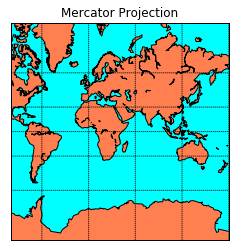

In [26]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

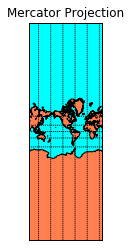

In [41]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',lat_0=55.585901, lon_0=-105.750596,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

In [33]:
m = Basemap?

In [ ]:
m = Basemap